In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install opencv-python


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
img = cv2.imread("passport.jpeg")
img_resized = cv2.resize(img, (100, 100))
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

In [4]:
R,B,G = cv2.split(img_rgb)

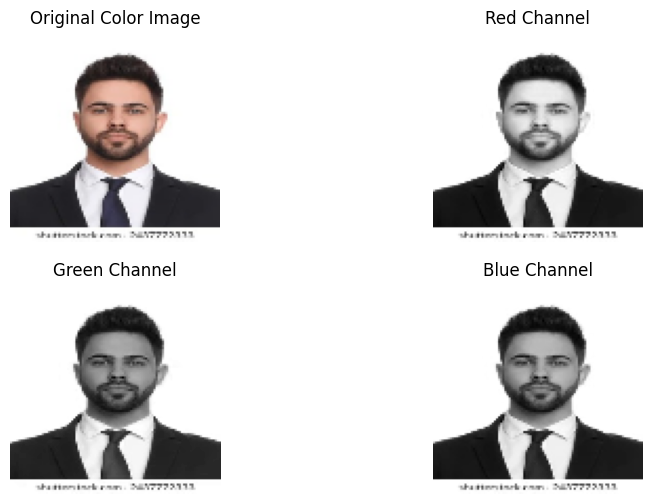

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("Original Color Image")
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(R,cmap='gray')
plt.title("Red Channel")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(G, cmap='gray')
plt.title("Green Channel")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(B, cmap='gray')
plt.title("Blue Channel")
plt.axis("off")
plt.show()

In [20]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X,Y = np.meshgrid(x,y)

In [21]:
sin_pattern = np.sin(2* np.pi * X)
sin_pattern = (sin_pattern - sin_pattern.min()) / (sin_pattern.max() - sin_pattern.min())
R_sin = R * sin_pattern
G_sin = G * sin_pattern
B_sin = B * sin_pattern

sin_img = cv2.merge([R_sin,G_sin,B_sin]).astype(np.uint8)

In [23]:
gaussian_pattern = np.exp(-(X**2 + Y**2))
gaussian_pattern = (gaussian_pattern - gaussian_pattern.min()) / (gaussian_pattern.max() - gaussian_pattern.min())
R_gauss = R * gaussian_pattern
G_gauss = G * gaussian_pattern
B_gauss = B * gaussian_pattern
gaussian_image = cv2.merge([R_gauss, G_gauss, B_gauss]).astype(np.uint8)

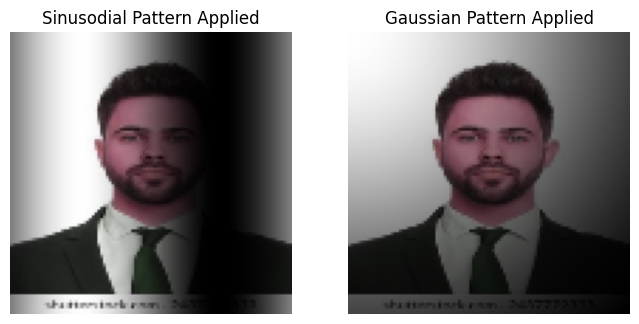

In [24]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(sin_img)
plt.title("Sinusodial Pattern Applied")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gaussian_image)
plt.title("Gaussian Pattern Applied")
plt.axis("off")

plt.show()

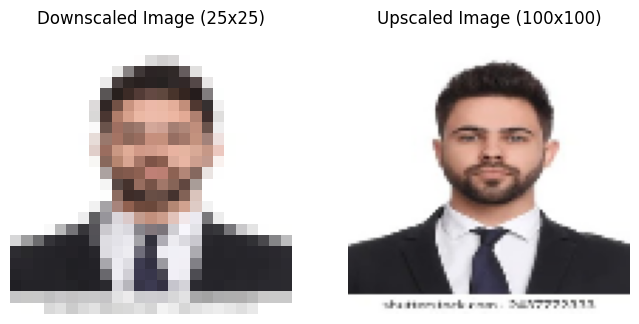

In [27]:
downscaled = cv2.resize(img_rgb,(25,25),interpolation=cv2.INTER_AREA)
upscaled = cv2.resize(img_rgb,(100,100),interpolation=cv2.INTER_AREA)
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(downscaled)
plt.title("Downscaled Image (25x25)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(upscaled)
plt.title("Upscaled Image (100x100)")
plt.axis("off")

plt.show()

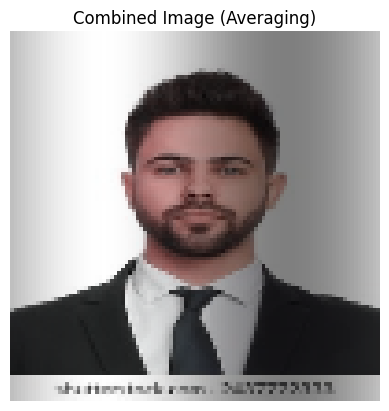

In [28]:
combined_image = (img_rgb.astype(np.float32) + sin_img.astype(np.float32)) / 2
combined_image = combined_image.astype(np.uint8)
plt.imshow(combined_image)
plt.title("Combined Image (Averaging)")
plt.axis("off")
plt.show()